# Kenya sign langauge project


In [27]:
# importing packages
import io
import cv2
import time
import numpy as np
import PIL.Image
import mediapipe as mp
import pandas as pd
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode

In [ ]:
# !pip uninstall mediapipe -y

# !pip install mediapipe==0.10.21

In [21]:
# The camera bridge
# javascript of opening the webcam
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    async function createDom() {
      if (div !== null) return stream;

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = 640;
      video.height = 480;
      video.setAttribute('playsinline', '');

      stream = await navigator.mediaDevices.getUserMedia({video: {facingMode: "user"}});
      div.appendChild(video);

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640;
      captureCanvas.height = 480;

      return stream;
    }

        async function stream_frame() {
        await createDom();
        captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
        return captureCanvas.toDataURL('image/jpeg', 0.8);
     }
        window.stream_frame = stream_frame;
        ''')
  display(js)

def get_frame():
  data = eval_js('stream_frame()')
  binary = b64decode(data.split(',')[1])
  img = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)
  return img


<IPython.core.display.Javascript object>

Starting Jambo collection...


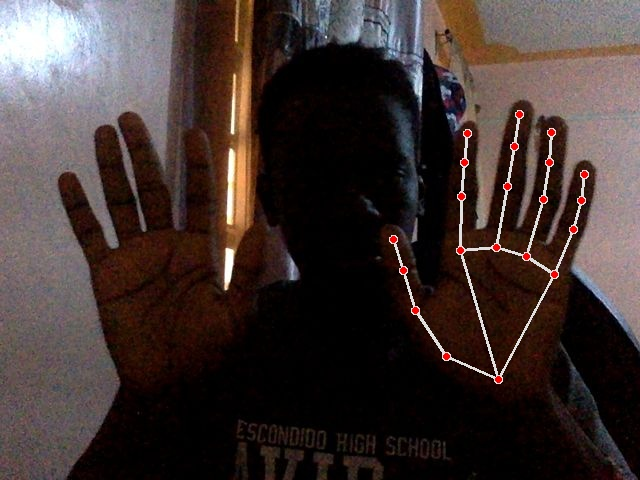


 Finished Jambo. Total data rows: 33


In [33]:
def collect_sign(label_name, num_samples=30):
    js_code = '''
    async function initCamera() {
      // Check if it already exists to avoid duplicates
      if (window.ksl_tracker) { window.ksl_tracker.stop(); }

      const div = document.createElement('div');
      div.id = 'ksl_container';
      const video = document.createElement('video');
      video.style.display = 'block';
      video.width = 640;
      video.height = 480;

      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      const canvas = document.createElement('canvas');
      canvas.width = 640;
      canvas.height = 480;

      window.ksl_tracker = {
        stream: stream,
        div: div,
        capture: function() {
          canvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          return canvas.toDataURL('image/jpeg', 0.8);
        },
        stop: function() {
          this.stream.getTracks().forEach(track => track.stop());
          this.div.remove();
          window.ksl_tracker = null;
        }
      };
      return "READY";
    }
    '''
    display(Javascript(js_code))
    eval_js('initCamera()')
    time.sleep(2) # Give browser time to start the hardware

    print(f"Starting {label_name} collection...")
    sample_count = 0

    try:
        while sample_count < num_samples:
            # Safety check: is the tracker still there?
            data_url = eval_js('window.ksl_tracker ? window.ksl_tracker.capture() : null')

            if data_url is None:
                print("Camera lost. Re-initializing...")
                eval_js('initCamera()')
                time.sleep(2)
                continue

            binary = b64decode(data_url.split(',')[1])
            img = cv2.imdecode(np.frombuffer(binary, np.uint8), -1)

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            results = hands.process(img_rgb)

            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    landmarks = []
                    for lm in hand_landmarks.landmark:
                        landmarks.extend([lm.x, lm.y, lm.z])
                    landmarks.append(label_name)
                    data.append(landmarks)

                    mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)

                sample_count += 1
                _, encoded_img = cv2.imencode('.jpg', img)
                display(Image(data=encoded_img, width=400), display_id='ksl_feed')
                print(f"Captured {sample_count}/{num_samples} for '{label_name}'", end='\r')

            time.sleep(0.1)

    except Exception as e:
        print(f"\n Error: {e}")
    finally:
        try:
            eval_js('if(window.ksl_tracker) window.ksl_tracker.stop()')
        except:
            pass
        print(f"\n Finished {label_name}. Total data rows: {len(data)}")

collect_sign('A',  num_samples=30)

In [ ]:
# colecting sign language B
collect_sign('B', num_samples=30)

# colecting sign langauge C

In [ ]:
# collecting sign langauge D

In [ ]:
# collecting sign langauge E

In [ ]:
# collecting sign langauge F

In [ ]:
# collecting sign langauge G